In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def getXY(csv, features=None, do_print=True):
    df = csv.copy()
    y_ori = np.array(df['type'])
    y_ori[y_ori == 0] = 0
    y_ori[y_ori == 2] = 1
    y_ori
    if(type(features) == type(None)):
        head = list(df.keys())
        head.remove('Unnamed: 0')
        head.remove('name')
        head.remove('score')
        head.remove('type')
        X_ori = np.array(df[head])
    else:
        X_ori = np.array(df[features])
    if(do_print):
        print(f"{X_ori.shape=} {y_ori.shape=}")
    return X_ori, y_ori

def train_model_SVM(X_ori,y_ori, do_print=True):
    X,y = X_ori.copy(), y_ori.copy()
    from sklearn.svm import SVC
    from sklearn.utils import shuffle
    from sklearn.model_selection import cross_val_score

    X_shuff,y_shuff = shuffle(X,y)
    model = SVC(kernel='rbf')
    cross = cross_val_score(model, X_shuff, y_shuff, cv=10, n_jobs=8)

    model = SVC(kernel='rbf')
    model.fit(X_shuff, y_shuff)
    ans = model.predict(X_shuff)
    acc = sum(ans == y_shuff) / len(y_shuff)
    if(do_print):
        print(acc, cross.mean(), cross)
        return model
    else:
        return model, acc, cross

def train_model_LR(X_ori,y_ori, do_print=True):
    X,y = X_ori.copy(), y_ori.copy()
    from sklearn.linear_model import LogisticRegression
    from sklearn.utils import shuffle
    from sklearn.model_selection import cross_val_score

    X_shuff,y_shuff = shuffle(X,y)
    model = LogisticRegression(random_state=0)
    cross = cross_val_score(model, X_shuff, y_shuff, cv=10, n_jobs=8)

    model = LogisticRegression(random_state=0)
    model.fit(X_shuff, y_shuff)
    ans = model.predict(X_shuff)
    acc = sum(ans == y_shuff) / len(y_shuff)
    if(do_print):
        print(acc, cross.mean(), cross)
        return model
    else:
        return model, acc, cross

def train_model_boost(X_ori,y_ori, do_print=True):
    X,y = X_ori.copy(), y_ori.copy()
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.utils import shuffle
    from sklearn.model_selection import cross_val_score

    X_shuff,y_shuff = shuffle(X,y)
    model = GradientBoostingClassifier(random_state=0)
    cross = cross_val_score(model, X_shuff, y_shuff, cv=10, n_jobs=8)

    model = GradientBoostingClassifier(random_state=0)
    model.fit(X_shuff, y_shuff)
    ans = model.predict(X_shuff)
    acc = sum(ans == y_shuff) / len(y_shuff)
    if(do_print):
        print(acc, cross.mean(), cross)
        return model
    else:
        return model, acc, cross

def train_model_ada(X_ori,y_ori, do_print=True):
    X,y = X_ori.copy(), y_ori.copy()
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.utils import shuffle
    from sklearn.model_selection import cross_val_score

    X_shuff,y_shuff = shuffle(X,y)
    model = AdaBoostClassifier(random_state=0)
    cross = cross_val_score(model, X_shuff, y_shuff, cv=10, n_jobs=8)

    model = AdaBoostClassifier(random_state=0)
    model.fit(X_shuff, y_shuff)
    ans = model.predict(X_shuff)
    acc = sum(ans == y_shuff) / len(y_shuff)
    if(do_print):
        print(acc, cross.mean(), cross)
        return model
    else:
        return model, acc, cross

def train_model_RForst(X_ori,y_ori, do_print=True):
    X,y = X_ori.copy(), y_ori.copy()
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.utils import shuffle
    from sklearn.model_selection import cross_val_score

    X_shuff,y_shuff = shuffle(X,y)
    model = RandomForestClassifier(random_state=0)
    cross = cross_val_score(model, X_shuff, y_shuff, cv=10, n_jobs=8)

    model = RandomForestClassifier(random_state=0)
    model.fit(X_shuff, y_shuff)
    ans = model.predict(X_shuff)
    acc = sum(ans == y_shuff) / len(y_shuff)
    if(do_print):
        print(acc, cross.mean(), cross)
        return model
    else:
        return model, acc, cross

def train_model_LDA(X_ori,y_ori, do_print=True):
    X,y = X_ori.copy(), y_ori.copy()
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.utils import shuffle
    from sklearn.model_selection import cross_val_score

    X_shuff,y_shuff = shuffle(X,y)
    model = LinearDiscriminantAnalysis()
    cross = cross_val_score(model, X_shuff, y_shuff, cv=10, n_jobs=8)

    model = LinearDiscriminantAnalysis()
    model.fit(X_shuff, y_shuff)
    ans = model.predict(X_shuff)
    acc = sum(ans == y_shuff) / len(y_shuff)
    if(do_print):
        print(acc, cross.mean(), cross)
        return model
    else:
        return model, acc, cross

In [2]:
csv = pd.read_csv('export/15s_133features_filter_std.csv')
features = np.array(['Fp1_Delta',
'F3_Delta',
'F4_Delta',
'C3_Delta',
'P4_Delta',
'F3_Theta',
'C3_Theta',
'T4_Theta',
'P4_Theta',
'F3_Alpha',
'F4_Alpha',
'F7_Alpha',
'T6_Alpha',
'P4_Alpha',
'F3_Beta',
'F3_Gamma',
'T3_Gamma',
'F3_Slow',
'F3_Low_beta',
'T4_Low_beta',
'C3_relative_gamma',
'alpha_frontal',
'alpha_temporal',
'alpha_asymmetry',
'beta_frontal'])

In [3]:
rank_lr = [14,4,24,20,1,2,7,18,13,11,10,9,0,12,15,8,19,5,3,6,16,22,23,21,17]

rank_boost = [1,24,6,8,2,15,16,12,19,3,11,9,14,18,10,13,20,0,5,4,7,21,23,17,22]

rank_ada = [8,19,4,15,14,24,1,2,13,11,12,7,6,5,3,9,20,21,0,23,16,17,18,22,10]

rank_rf = [1,24,15,6,3,16,7,19,9,8,5,2,20,4,11,0,14,13,10,12,17,21,23,18,22]

rank_lda = [17,10,14,5,18,20,24,2,1,13,4,7,21,6,9,11,3,0,23,22,16,8,19,15,12]

In [4]:
feature_score = [0] * 25 
for i in range(25):
    score = 25-i
    round_feature = [ rank_lr[i], rank_boost[i], rank_ada[i], rank_rf[i], rank_lda[i] ]
    for feature in round_feature:
        feature_score[feature] += score

print(feature_score)
feature_score = np.array(feature_score)

[46, 107, 91, 64, 80, 64, 76, 71, 77, 66, 58, 68, 52, 68, 91, 78, 54, 37, 56, 71, 73, 31, 14, 22, 110]


In [5]:
rank_ensemble = (feature_score*-1).argsort()
print(feature_score[rank_ensemble])

print("no", "index", "score", "name")
for i in range(len(rank_ensemble)):
    print(i, rank_ensemble[i], feature_score[rank_ensemble[i]], features[rank_ensemble[i]] )

[110 107  91  91  80  78  77  76  73  71  71  68  68  66  64  64  58  56
  54  52  46  37  31  22  14]
no index score name
0 24 110 beta_frontal
1 1 107 F3_Delta
2 2 91 F4_Delta
3 14 91 F3_Beta
4 4 80 P4_Delta
5 15 78 F3_Gamma
6 8 77 P4_Theta
7 6 76 C3_Theta
8 20 73 C3_relative_gamma
9 7 71 T4_Theta
10 19 71 T4_Low_beta
11 13 68 P4_Alpha
12 11 68 F7_Alpha
13 9 66 F3_Alpha
14 5 64 F3_Theta
15 3 64 C3_Delta
16 10 58 F4_Alpha
17 18 56 F3_Low_beta
18 16 54 T3_Gamma
19 12 52 T6_Alpha
20 0 46 Fp1_Delta
21 17 37 F3_Slow
22 21 31 alpha_frontal
23 23 22 alpha_asymmetry
24 22 14 alpha_temporal


In [6]:
def train_pipe(X_ori,y_ori):
    X,y = X_ori.copy(), y_ori.copy()
    model, acc, cross = train_model_SVM(X,y,do_print=False)
    print("SVM:",round(acc,3), round(cross.mean(),3), round(cross.std(),3))

    X,y = X_ori.copy(), y_ori.copy()
    _, acc, cross = train_model_LR(X,y,do_print=False)
    print("LR:",round(acc,3), round(cross.mean(),3), round(cross.std(),3))

    X,y = X_ori.copy(), y_ori.copy()
    _, acc, cross = train_model_boost(X,y,do_print=False)
    print("Boost:",round(acc,3), round(cross.mean(),3), round(cross.std(),3))

    X,y = X_ori.copy(), y_ori.copy()
    _, acc, cross = train_model_ada(X,y,do_print=False)
    print("Ada:",round(acc,3), round(cross.mean(),3), round(cross.std(),3))

    X,y = X_ori.copy(), y_ori.copy()
    _, acc, cross = train_model_RForst(X,y,do_print=False)
    print("RF:",round(acc,3), round(cross.mean(),3), round(cross.std(),3))

    X,y = X_ori.copy(), y_ori.copy()
    _, acc, cross = train_model_LDA(X,y,do_print=False)
    print("LDA:",round(acc,3), round(cross.mean(),3), round(cross.std(),3))

    return model

def plot_TSNE(X_ori, y_ori, model):
    X,y = X_ori.copy(), y_ori.copy()
    ans = model.predict(X)

    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)
    fig,ax = plt.subplots(ncols=3, figsize=(30,10))

    cdict = {0: '#3D7345', 1: '#BA494B'}
    ldict = {0: 'Non-stress-true', 1: 'Stress-true', 2: 'Non-stress-false', 3: 'Stress-false'}
    
    for g in np.unique(y):
        ix = np.where(y == g)
        correct = np.where(ans[ix] == y[ix])
        wrong = np.where(ans[ix] != y[ix])
        X_embedded_filt = X_embedded[ix]
        ax[0].scatter(X_embedded_filt[correct,0], X_embedded_filt[correct,1], marker='.', c=cdict[g], label=ldict[g], s=5)#,linewidths=0.5)
        ax[0].scatter(X_embedded_filt[wrong,0], X_embedded_filt[wrong,1], marker='x', c=cdict[g], label=ldict[g+2], s=20)#, linewidths=0.5)

    for name in csv['name'].unique():
        point = X_embedded[csv['name'] == name].mean(axis=0)
        ax[0].scatter(point[0],point[1], c='black', marker='.')
        ax[0].text(point[0],point[1], s=f"{name}")
        # ax[0].text(point[0],point[1], s=score)
    ax[0].legend()
    

    # color_list = ['#800000','#FF0000','#800080','#FF00FF','#008000','#00FF00','#808000','#ff8c00','#000080','#0000FF','#008080','#00FFFF']
    color_list = ['#6B2084','#574301','#BF5B04','#DDB247','#D9B29C','#999348','#3D7345','#2F5D8C','#7393C2','#AB80AD','#F2A7CA','#BA494B']
    shape_list = ['.','+','x']
    for index,name in enumerate(csv['name'].unique()):
        point = X_embedded[csv['name'] == name]
        score = int(csv['score'][csv['name'] == name].mean(axis=0))
        color, shape = color_list[index%12], shape_list[index//12]
        
        ax[1].scatter(point[:,0].mean(),point[:,1].mean(), c='black', marker='.')
        ax[1].text(point[:,0].mean(),point[:,1].mean(), s=name)
        ax[1].scatter(point[:,0],point[:,1], marker=shape, c=color)
    
        ax[2].scatter(point[:,0].mean(),point[:,1].mean(), c='black', marker='.')
        ax[2].text(point[:,0].mean(),point[:,1].mean(), s=score)
        ax[2].scatter(point[:,0],point[:,1], marker=shape, c=color)
    plt.show()

========== 1 ==========
['P4_Theta']
X_ori.shape=(720, 1) y_ori.shape=(720,)
SVM: 0.614 0.612 0.04
LR: 0.538 0.539 0.034
Boost: 0.75 0.562 0.057
Ada: 0.66 0.599 0.047
RF: 0.999 0.524 0.04
LDA: 0.54 0.532 0.033


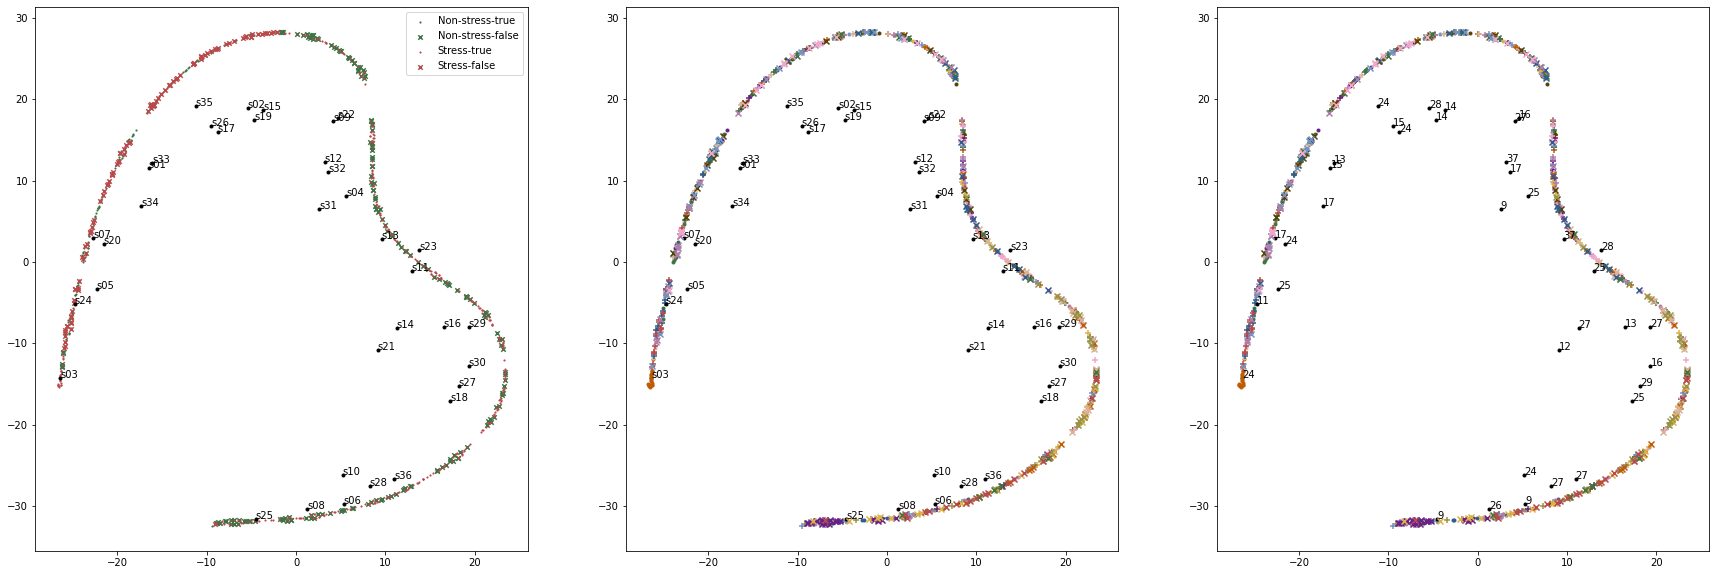

========== 2 ==========
['P4_Theta' 'T4_Low_beta']
X_ori.shape=(720, 2) y_ori.shape=(720,)
SVM: 0.719 0.701 0.052
LR: 0.582 0.575 0.036
Boost: 0.861 0.667 0.048
Ada: 0.721 0.625 0.041
RF: 1.0 0.657 0.042
LDA: 0.579 0.574 0.033


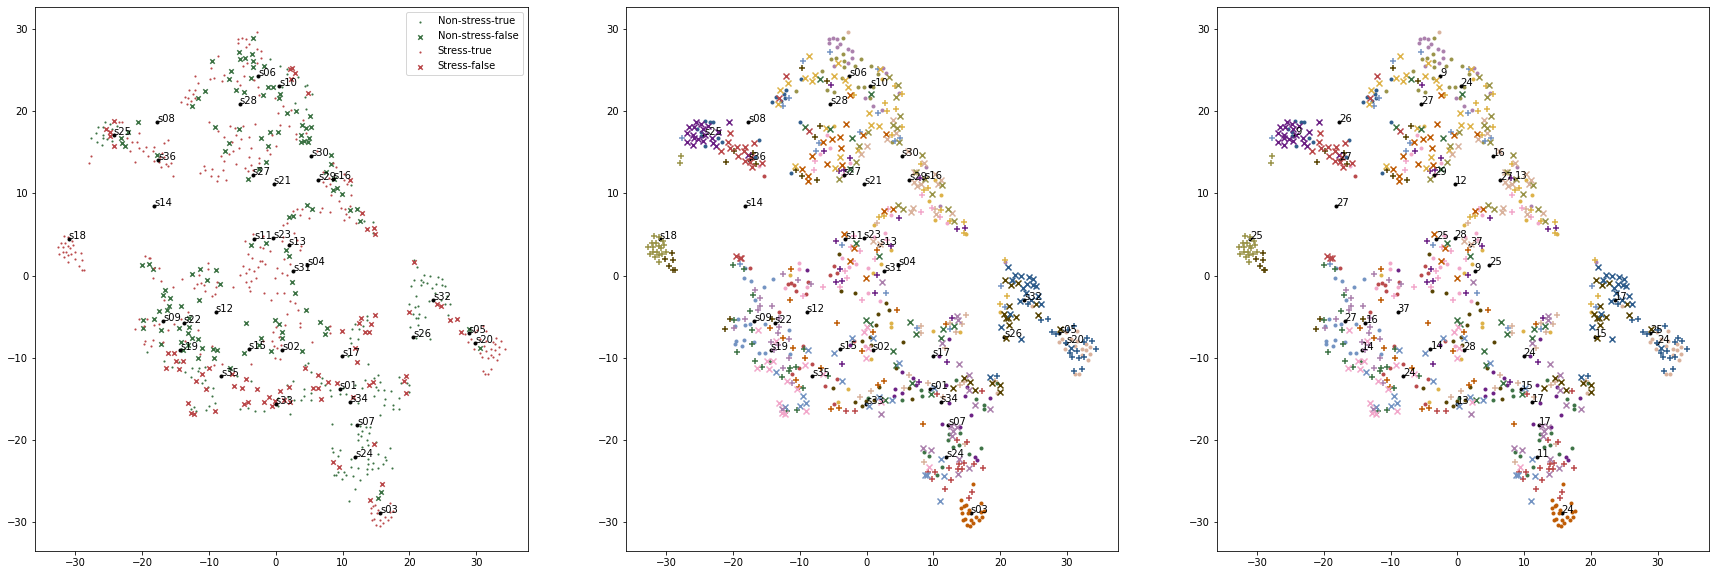

========== 3 ==========
['P4_Theta' 'T4_Low_beta' 'P4_Delta']
X_ori.shape=(720, 3) y_ori.shape=(720,)
SVM: 0.758 0.732 0.065
LR: 0.597 0.59 0.064
Boost: 0.882 0.731 0.056
Ada: 0.753 0.685 0.055
RF: 1.0 0.747 0.043
LDA: 0.601 0.596 0.047


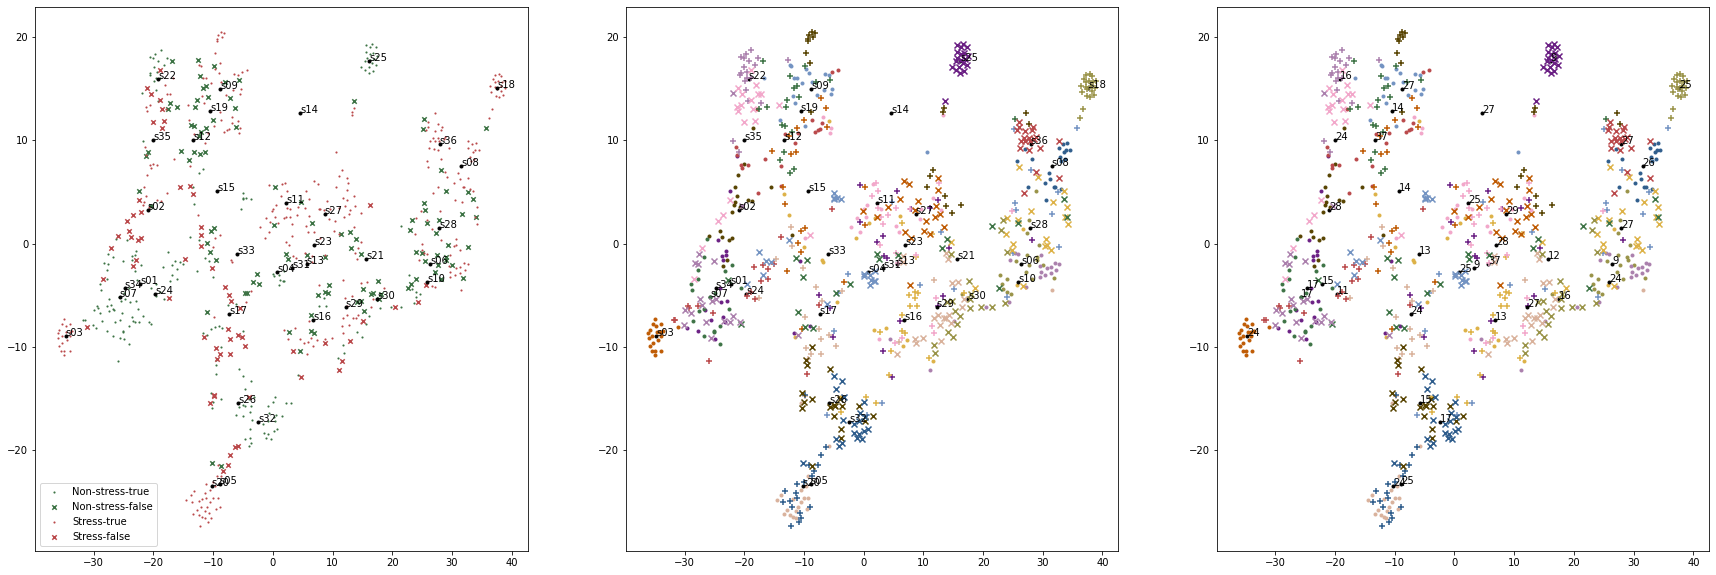

========== 4 ==========
['P4_Theta' 'T4_Low_beta' 'P4_Delta' 'F3_Gamma']
X_ori.shape=(720, 4) y_ori.shape=(720,)
SVM: 0.858 0.844 0.047
LR: 0.611 0.607 0.031
Boost: 0.974 0.889 0.033
Ada: 0.843 0.771 0.029
RF: 1.0 0.89 0.033
LDA: 0.612 0.612 0.036


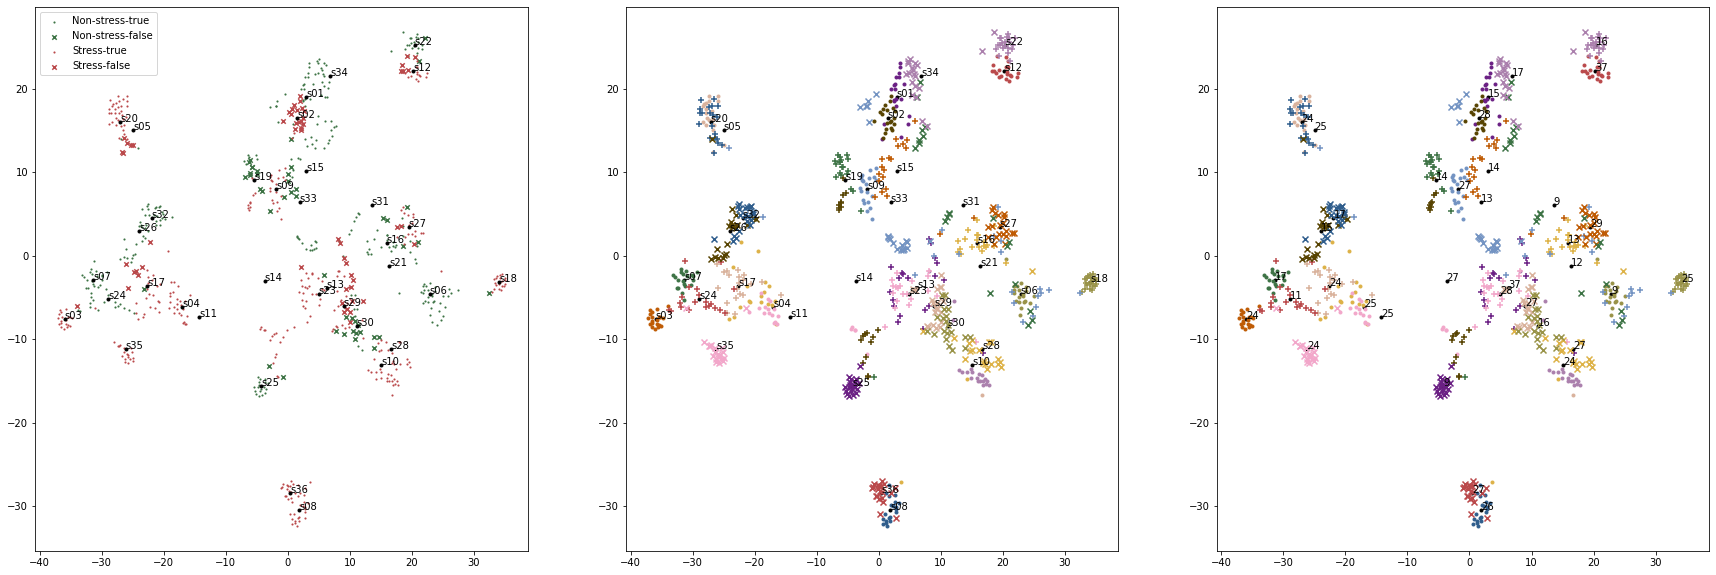

========== 5 ==========
['P4_Theta' 'T4_Low_beta' 'P4_Delta' 'F3_Gamma' 'F3_Beta']
X_ori.shape=(720, 5) y_ori.shape=(720,)
SVM: 0.885 0.856 0.035
LR: 0.632 0.631 0.063
Boost: 0.981 0.907 0.026
Ada: 0.871 0.806 0.038
RF: 1.0 0.914 0.037
LDA: 0.639 0.635 0.071


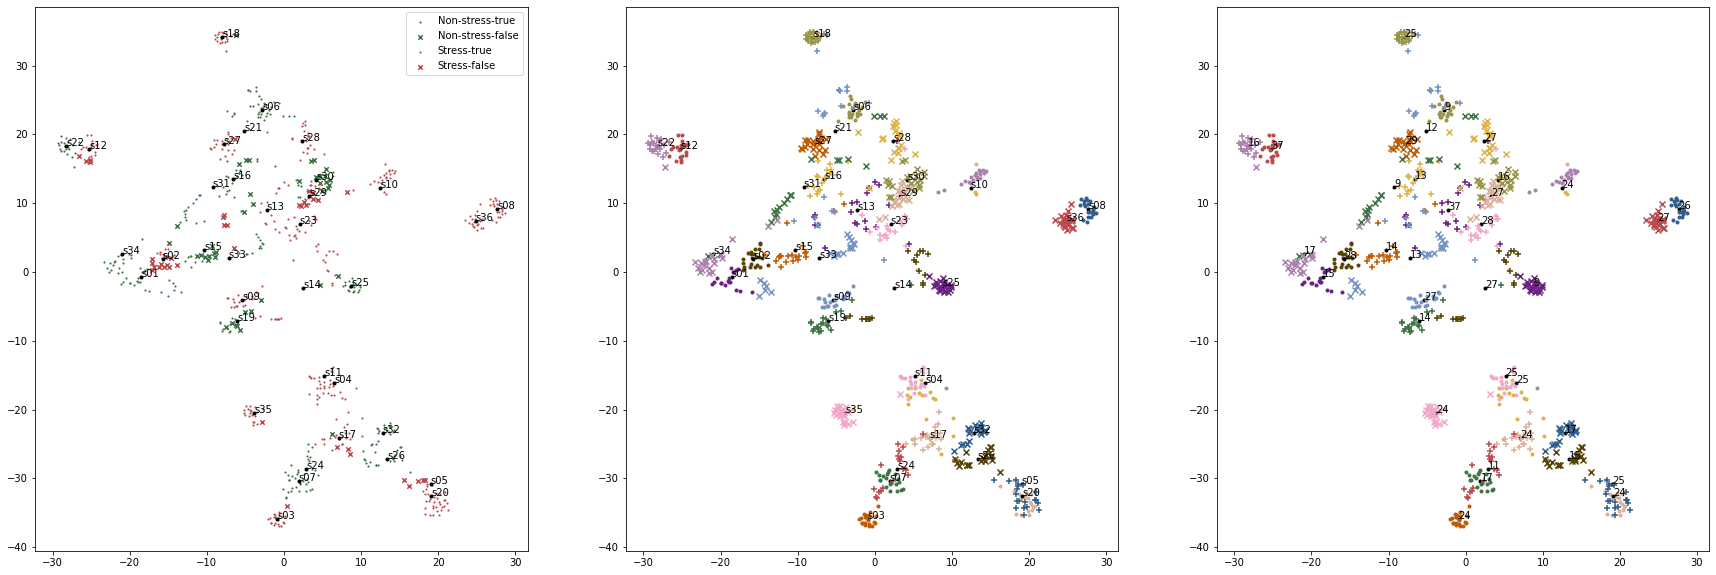

========== 6 ==========
['P4_Theta' 'T4_Low_beta' 'P4_Delta' 'F3_Gamma' 'F3_Beta' 'beta_frontal']
X_ori.shape=(720, 6) y_ori.shape=(720,)
SVM: 0.914 0.892 0.033
LR: 0.686 0.678 0.053
Boost: 0.988 0.921 0.023
Ada: 0.91 0.853 0.04
RF: 1.0 0.938 0.026
LDA: 0.682 0.678 0.051


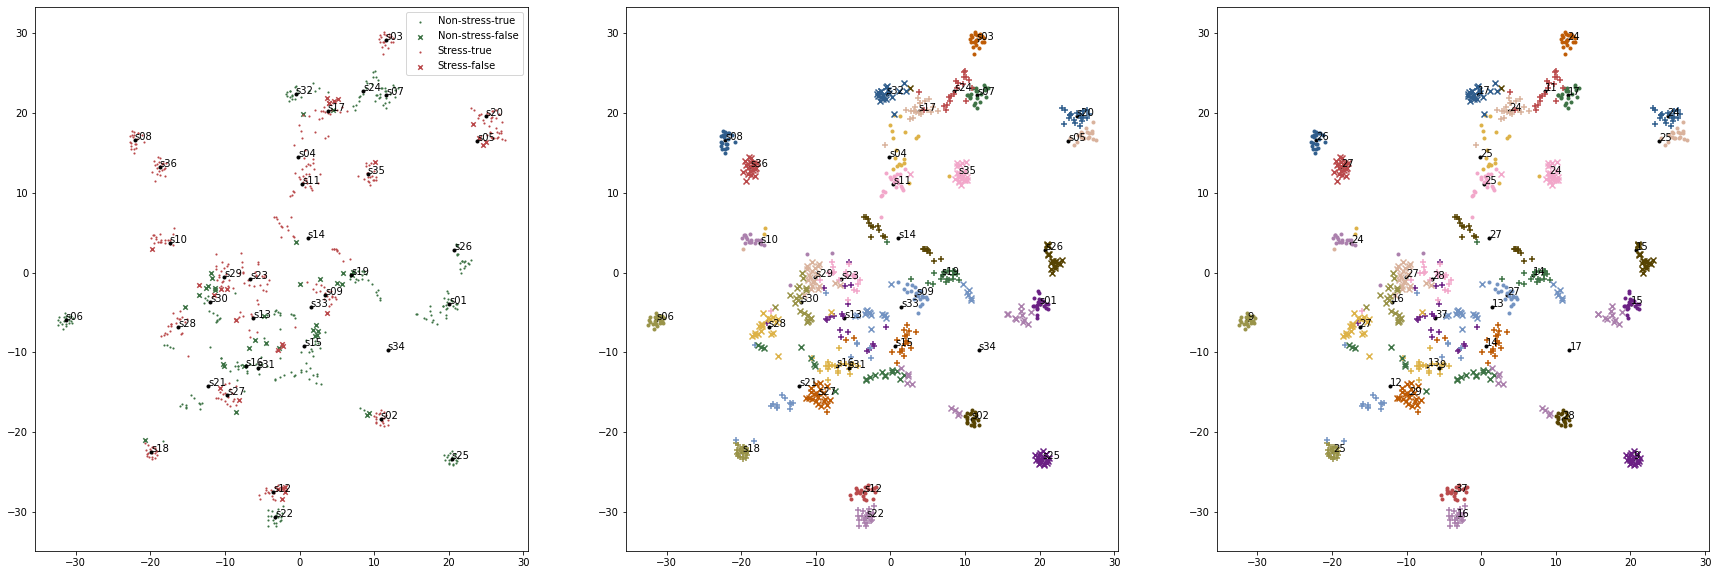

========== 7 ==========
['P4_Theta' 'T4_Low_beta' 'P4_Delta' 'F3_Gamma' 'F3_Beta' 'beta_frontal'
 'F3_Delta']
X_ori.shape=(720, 7) y_ori.shape=(720,)
SVM: 0.943 0.917 0.023
LR: 0.743 0.739 0.061
Boost: 0.997 0.94 0.016
Ada: 0.964 0.915 0.038
RF: 1.0 0.96 0.023
LDA: 0.743 0.735 0.024


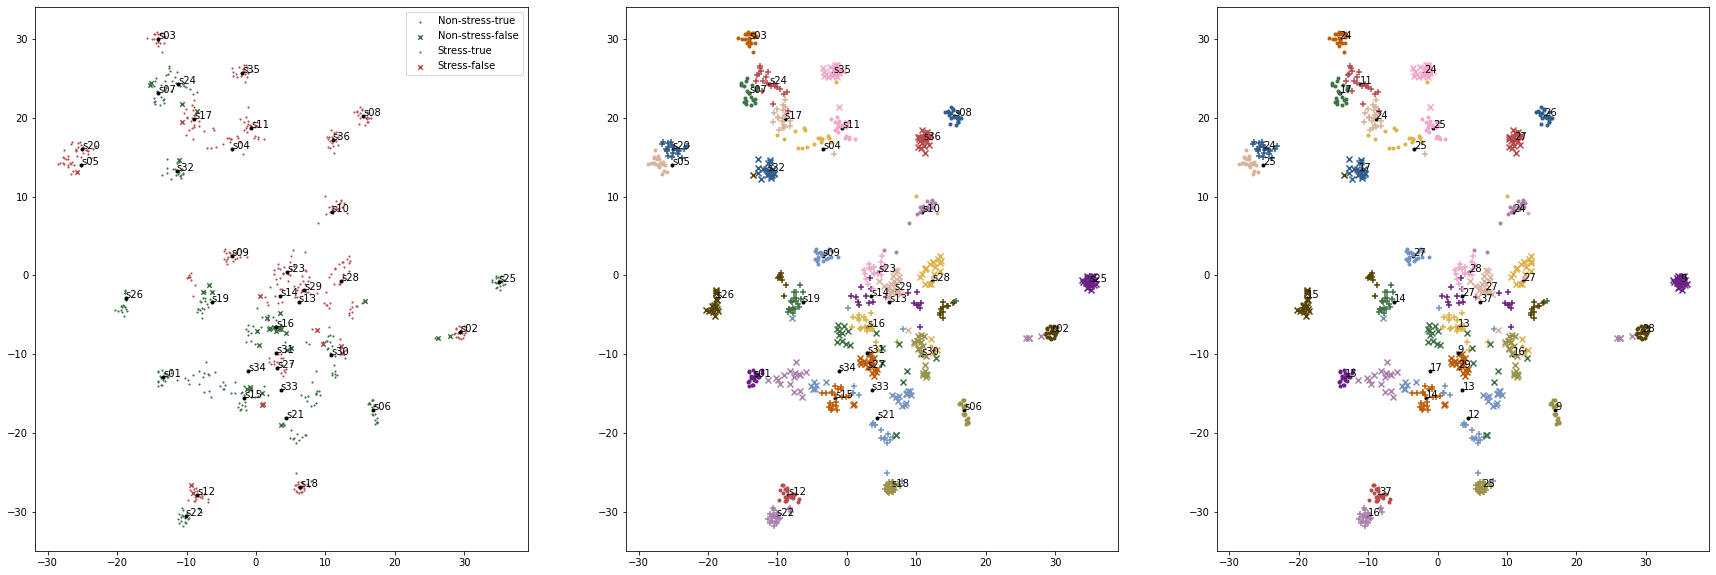

========== 8 ==========
['P4_Theta' 'T4_Low_beta' 'P4_Delta' 'F3_Gamma' 'F3_Beta' 'beta_frontal'
 'F3_Delta' 'F4_Delta']
X_ori.shape=(720, 8) y_ori.shape=(720,)
SVM: 0.946 0.931 0.031
LR: 0.767 0.76 0.02
Boost: 0.997 0.933 0.022
Ada: 0.962 0.915 0.021
RF: 1.0 0.958 0.026
LDA: 0.781 0.767 0.062


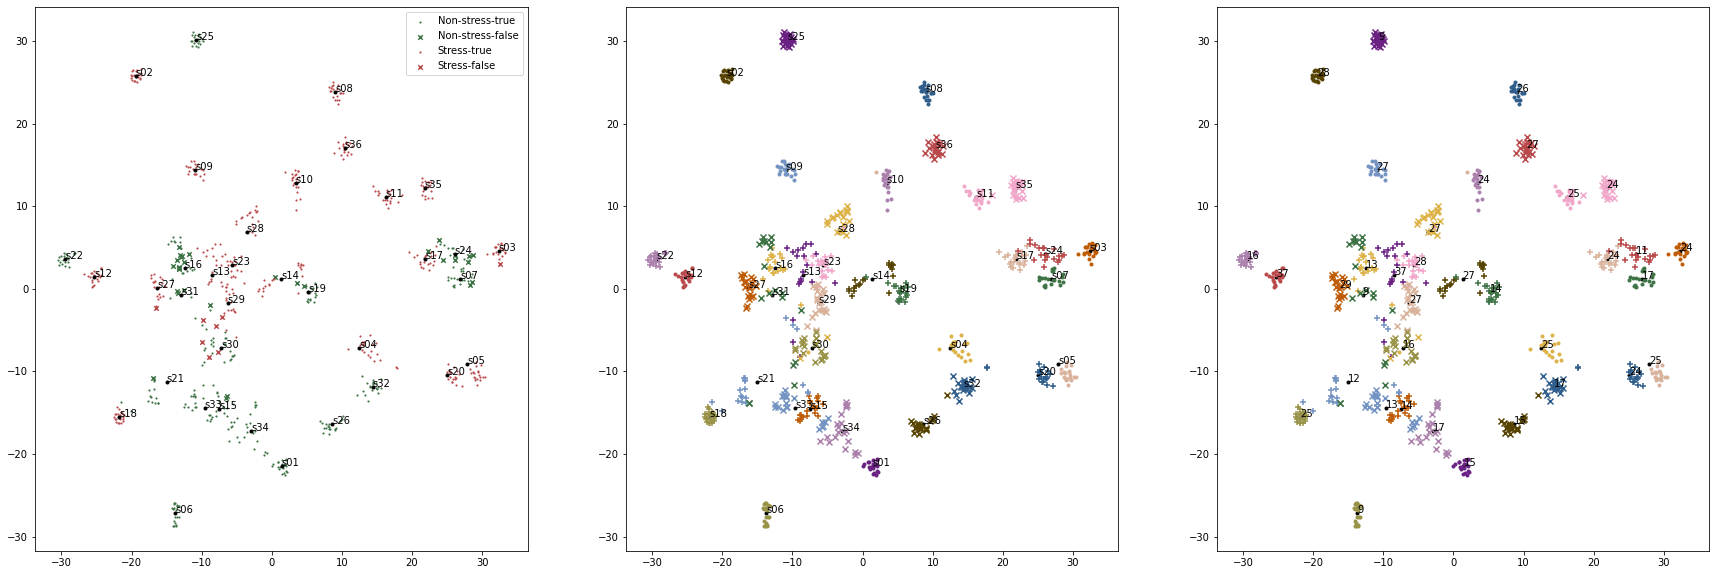

========== 9 ==========
['P4_Theta' 'T4_Low_beta' 'P4_Delta' 'F3_Gamma' 'F3_Beta' 'beta_frontal'
 'F3_Delta' 'F4_Delta' 'P4_Alpha']
X_ori.shape=(720, 9) y_ori.shape=(720,)
SVM: 0.969 0.953 0.02
LR: 0.815 0.808 0.042
Boost: 1.0 0.953 0.02
Ada: 0.971 0.921 0.028
RF: 1.0 0.951 0.024
LDA: 0.818 0.81 0.055


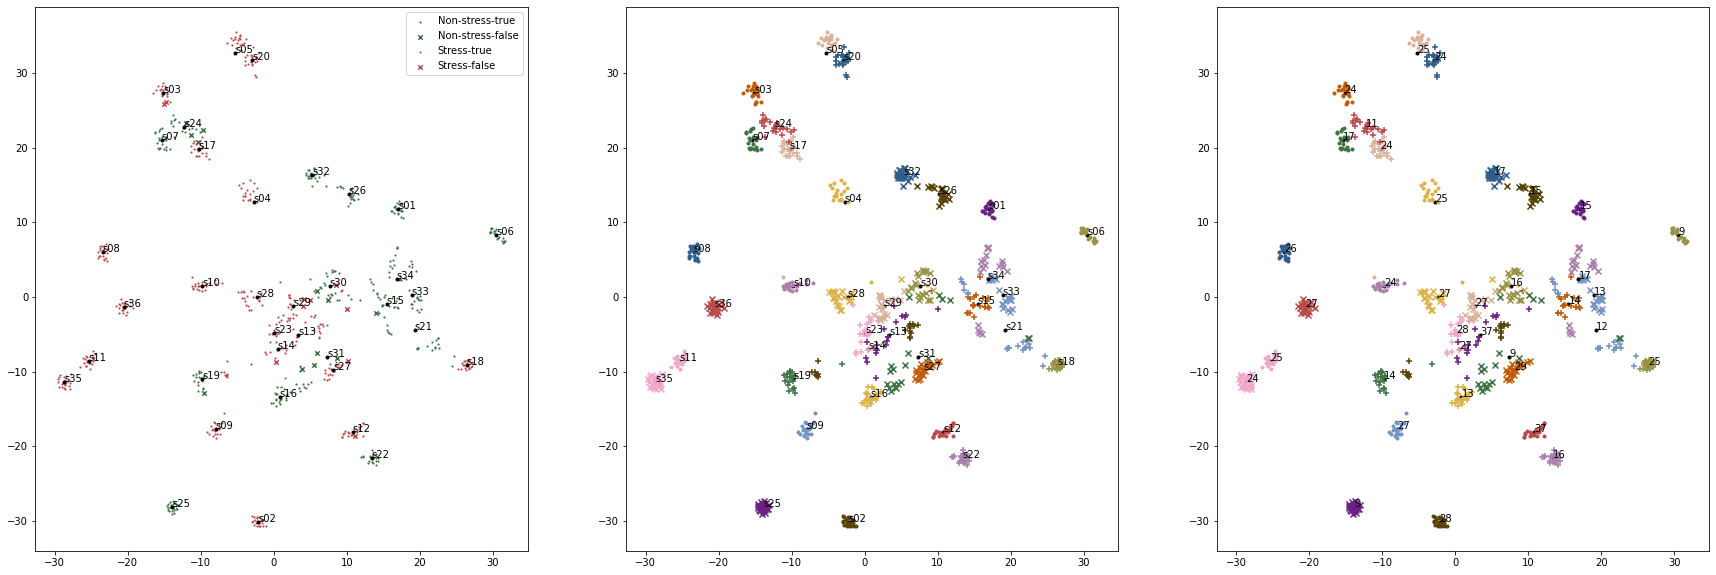

========== 10 ==========
['P4_Theta' 'T4_Low_beta' 'P4_Delta' 'F3_Gamma' 'F3_Beta' 'beta_frontal'
 'F3_Delta' 'F4_Delta' 'P4_Alpha' 'F7_Alpha']
X_ori.shape=(720, 10) y_ori.shape=(720,)
SVM: 0.972 0.956 0.021
LR: 0.808 0.806 0.051
Boost: 1.0 0.951 0.028
Ada: 0.983 0.931 0.032
RF: 1.0 0.962 0.027
LDA: 0.81 0.803 0.033


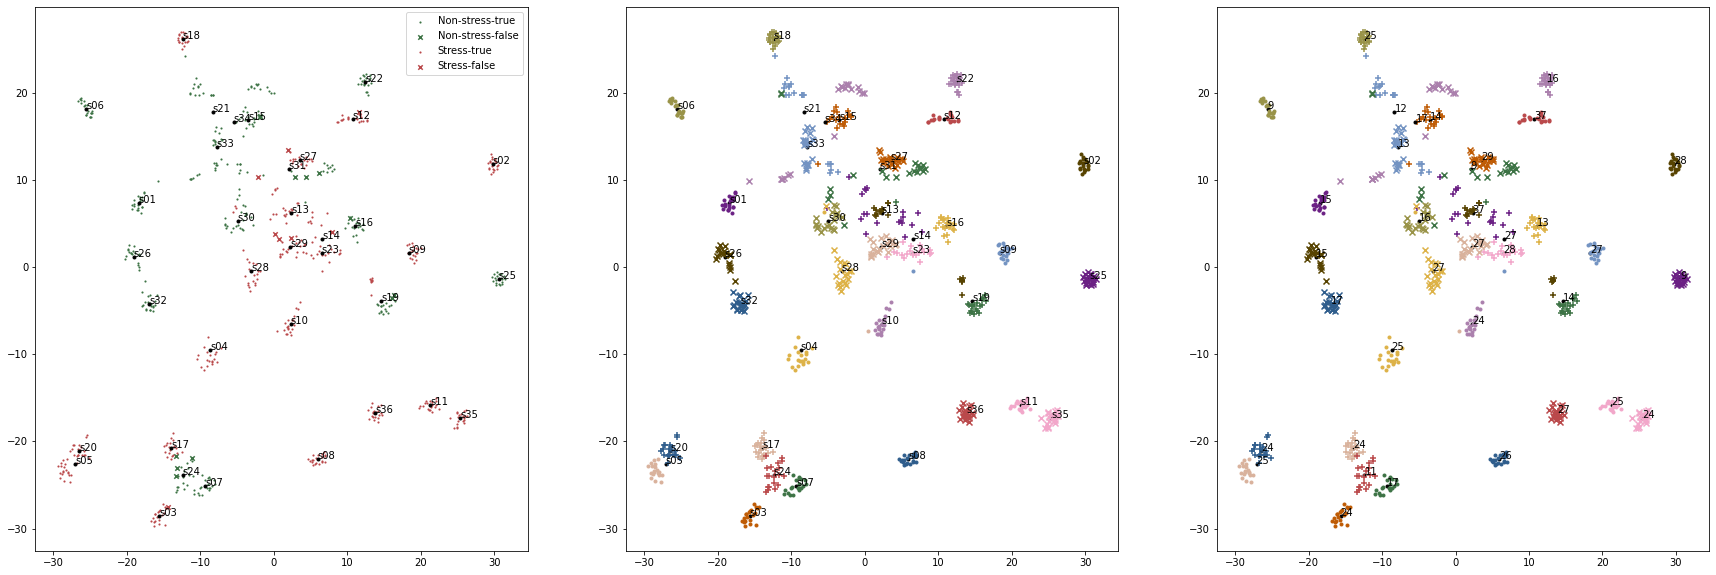

========== 11 ==========
['P4_Theta' 'T4_Low_beta' 'P4_Delta' 'F3_Gamma' 'F3_Beta' 'beta_frontal'
 'F3_Delta' 'F4_Delta' 'P4_Alpha' 'F7_Alpha' 'T6_Alpha']
X_ori.shape=(720, 11) y_ori.shape=(720,)
SVM: 0.976 0.954 0.024
LR: 0.821 0.807 0.041
Boost: 0.999 0.96 0.023
Ada: 0.994 0.939 0.032
RF: 1.0 0.967 0.021
LDA: 0.811 0.807 0.037


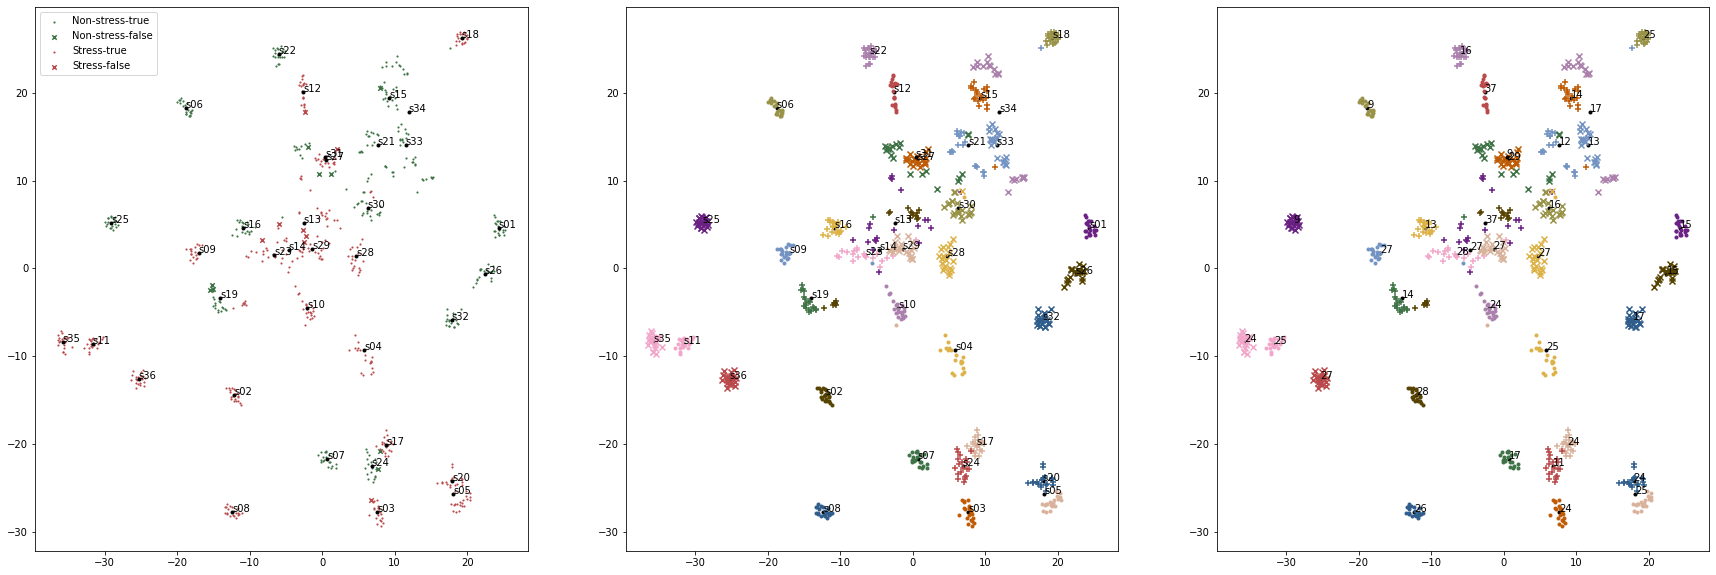

========== 12 ==========
['P4_Theta' 'T4_Low_beta' 'P4_Delta' 'F3_Gamma' 'F3_Beta' 'beta_frontal'
 'F3_Delta' 'F4_Delta' 'P4_Alpha' 'F7_Alpha' 'T6_Alpha' 'T4_Theta']
X_ori.shape=(720, 12) y_ori.shape=(720,)
SVM: 0.978 0.964 0.029
LR: 0.832 0.831 0.038
Boost: 0.997 0.958 0.026
Ada: 0.981 0.919 0.042
RF: 1.0 0.969 0.02
LDA: 0.821 0.814 0.037


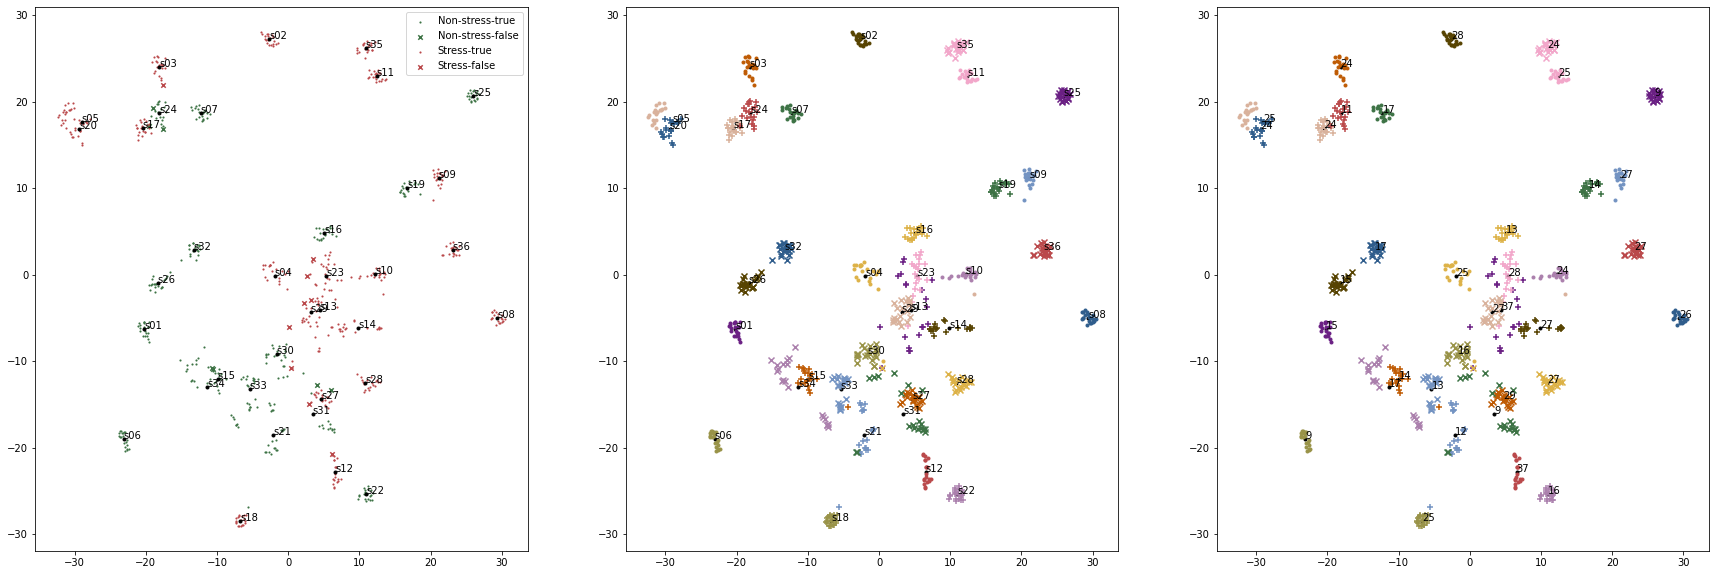

========== 13 ==========
['P4_Theta' 'T4_Low_beta' 'P4_Delta' 'F3_Gamma' 'F3_Beta' 'beta_frontal'
 'F3_Delta' 'F4_Delta' 'P4_Alpha' 'F7_Alpha' 'T6_Alpha' 'T4_Theta'
 'C3_Theta']
X_ori.shape=(720, 13) y_ori.shape=(720,)
SVM: 0.985 0.974 0.019
LR: 0.833 0.822 0.033
Boost: 1.0 0.962 0.026
Ada: 0.986 0.929 0.027
RF: 1.0 0.967 0.025
LDA: 0.818 0.817 0.036


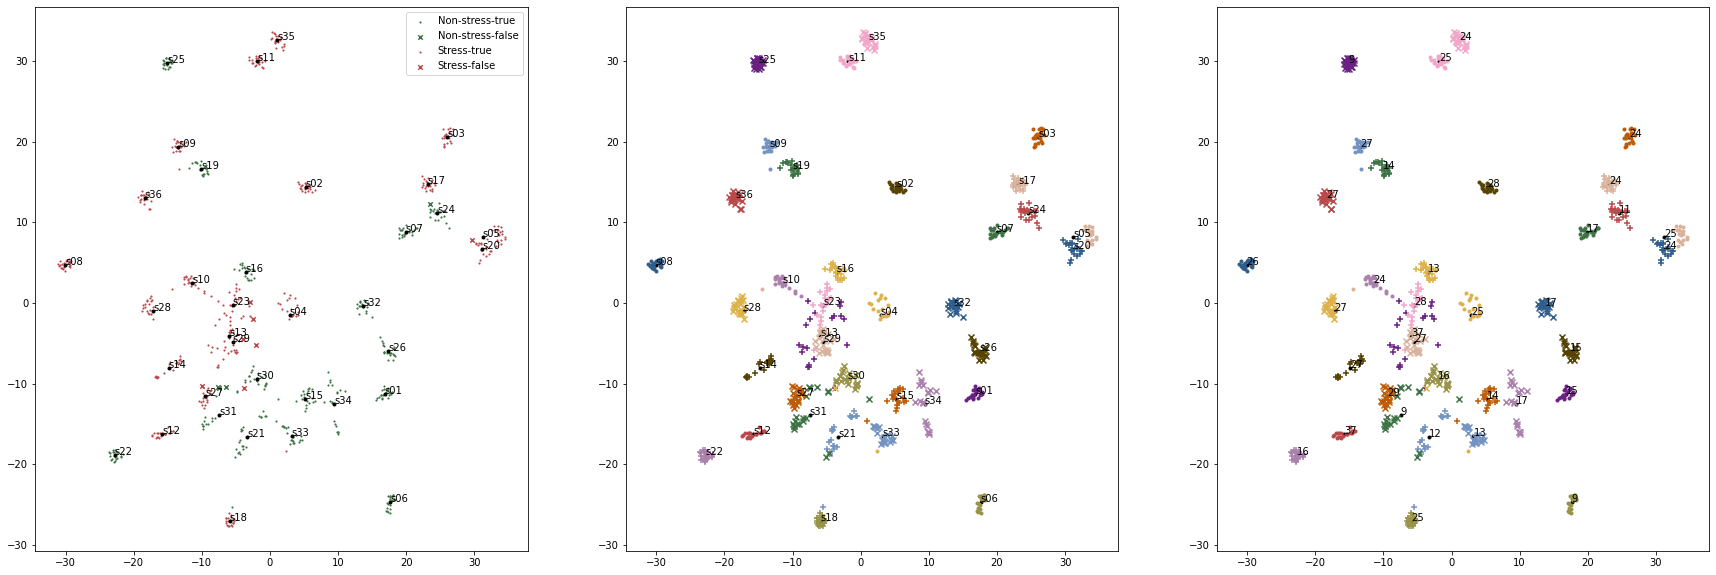

========== 14 ==========
['P4_Theta' 'T4_Low_beta' 'P4_Delta' 'F3_Gamma' 'F3_Beta' 'beta_frontal'
 'F3_Delta' 'F4_Delta' 'P4_Alpha' 'F7_Alpha' 'T6_Alpha' 'T4_Theta'
 'C3_Theta' 'F3_Theta']
X_ori.shape=(720, 14) y_ori.shape=(720,)
SVM: 0.985 0.981 0.018
LR: 0.828 0.826 0.031
Boost: 1.0 0.967 0.018
Ada: 0.989 0.938 0.031
RF: 1.0 0.974 0.01
LDA: 0.825 0.817 0.059


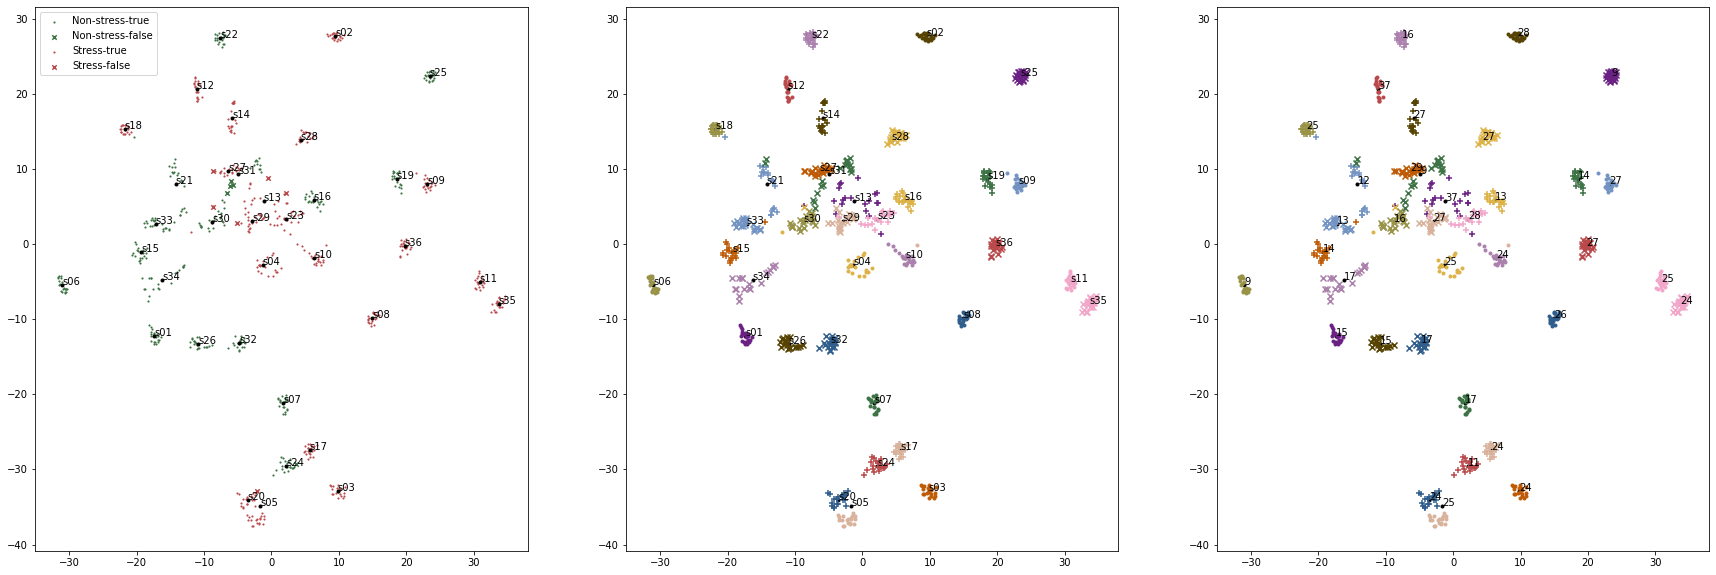

========== 15 ==========
['P4_Theta' 'T4_Low_beta' 'P4_Delta' 'F3_Gamma' 'F3_Beta' 'beta_frontal'
 'F3_Delta' 'F4_Delta' 'P4_Alpha' 'F7_Alpha' 'T6_Alpha' 'T4_Theta'
 'C3_Theta' 'F3_Theta' 'C3_Delta']
X_ori.shape=(720, 15) y_ori.shape=(720,)
SVM: 0.989 0.979 0.016
LR: 0.84 0.821 0.04
Boost: 1.0 0.962 0.02
Ada: 0.986 0.94 0.02
RF: 1.0 0.972 0.014
LDA: 0.829 0.818 0.057


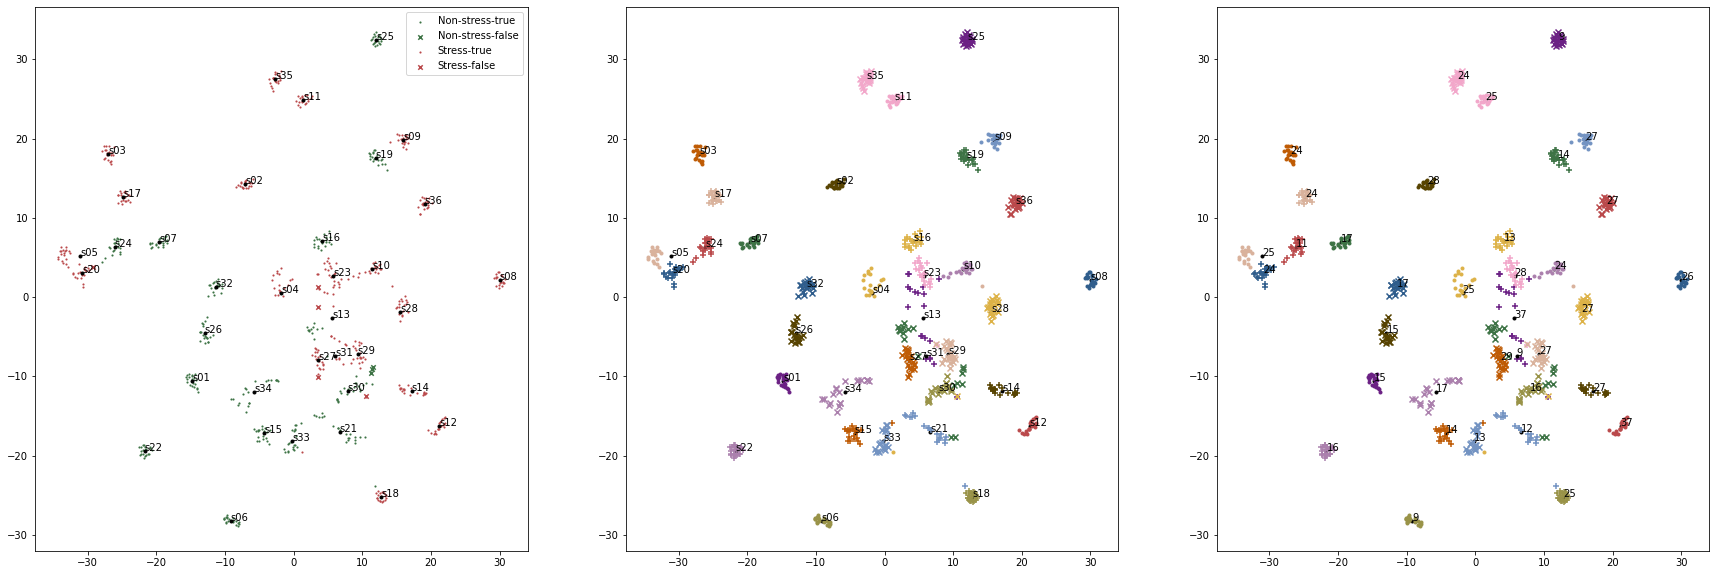

========== 16 ==========
['P4_Theta' 'T4_Low_beta' 'P4_Delta' 'F3_Gamma' 'F3_Beta' 'beta_frontal'
 'F3_Delta' 'F4_Delta' 'P4_Alpha' 'F7_Alpha' 'T6_Alpha' 'T4_Theta'
 'C3_Theta' 'F3_Theta' 'C3_Delta' 'F3_Alpha']
X_ori.shape=(720, 16) y_ori.shape=(720,)
SVM: 0.989 0.981 0.017
LR: 0.838 0.835 0.035
Boost: 1.0 0.956 0.026
Ada: 0.996 0.936 0.02
RF: 1.0 0.968 0.018
LDA: 0.832 0.814 0.053


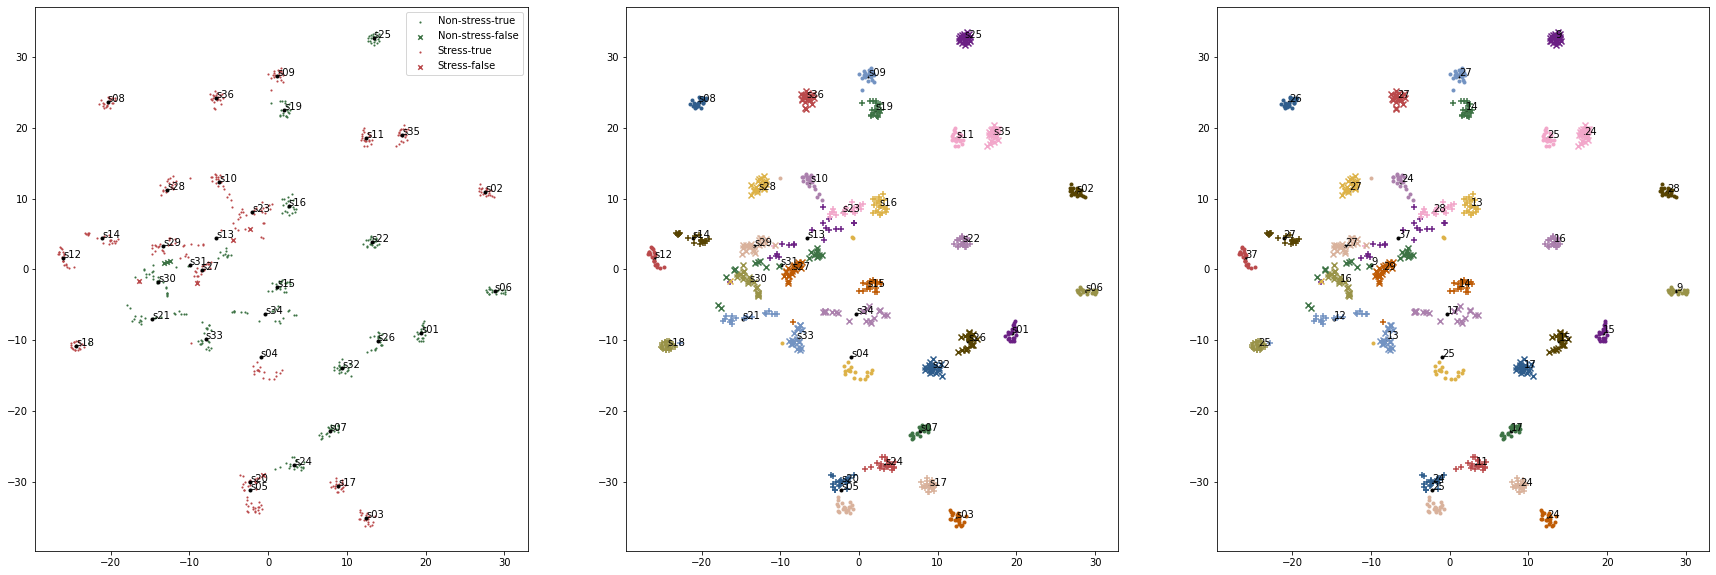

========== 17 ==========
['P4_Theta' 'T4_Low_beta' 'P4_Delta' 'F3_Gamma' 'F3_Beta' 'beta_frontal'
 'F3_Delta' 'F4_Delta' 'P4_Alpha' 'F7_Alpha' 'T6_Alpha' 'T4_Theta'
 'C3_Theta' 'F3_Theta' 'C3_Delta' 'F3_Alpha' 'C3_relative_gamma']
X_ori.shape=(720, 17) y_ori.shape=(720,)
SVM: 0.99 0.981 0.009
LR: 0.857 0.844 0.03
Boost: 1.0 0.958 0.016
Ada: 0.997 0.946 0.032
RF: 1.0 0.968 0.023
LDA: 0.839 0.821 0.063


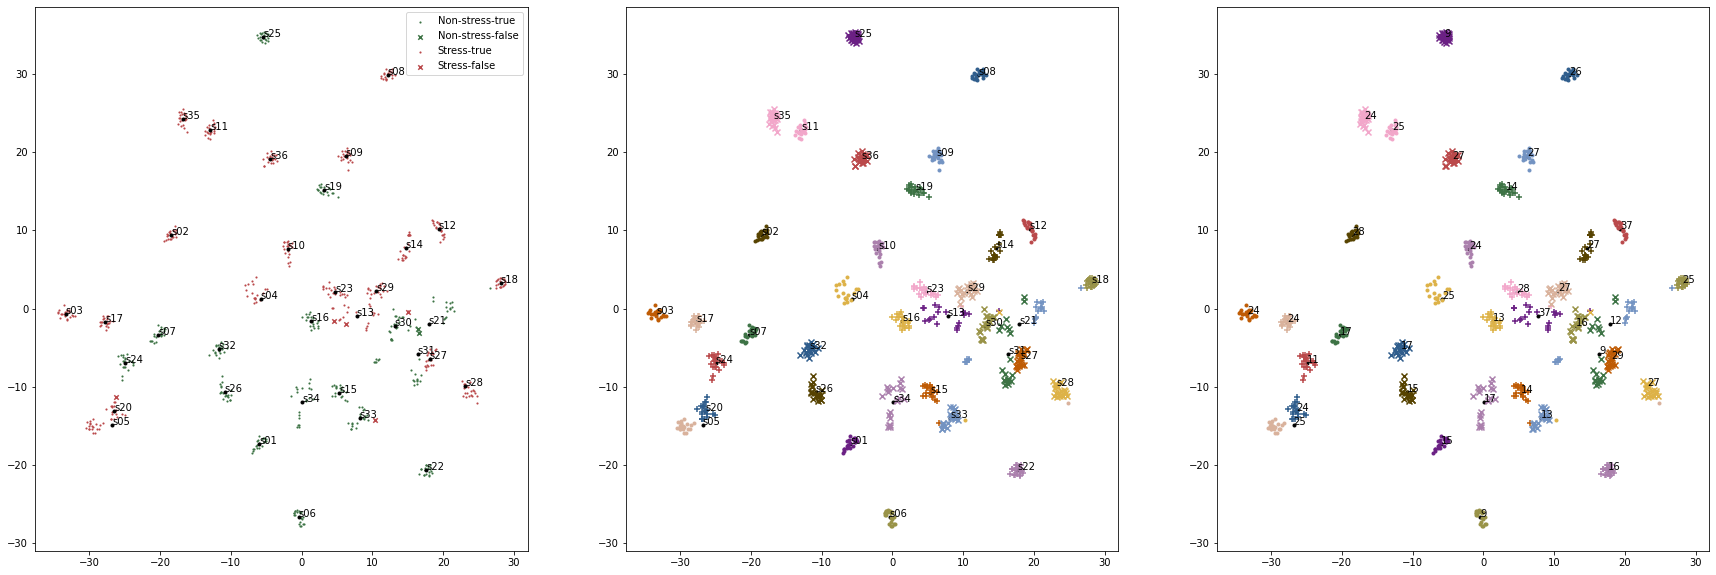

========== 18 ==========
['P4_Theta' 'T4_Low_beta' 'P4_Delta' 'F3_Gamma' 'F3_Beta' 'beta_frontal'
 'F3_Delta' 'F4_Delta' 'P4_Alpha' 'F7_Alpha' 'T6_Alpha' 'T4_Theta'
 'C3_Theta' 'F3_Theta' 'C3_Delta' 'F3_Alpha' 'C3_relative_gamma'
 'alpha_frontal']
X_ori.shape=(720, 18) y_ori.shape=(720,)
SVM: 0.989 0.983 0.01
LR: 0.856 0.849 0.049
Boost: 1.0 0.964 0.013
Ada: 0.997 0.928 0.026
RF: 1.0 0.979 0.016
LDA: 0.842 0.832 0.026


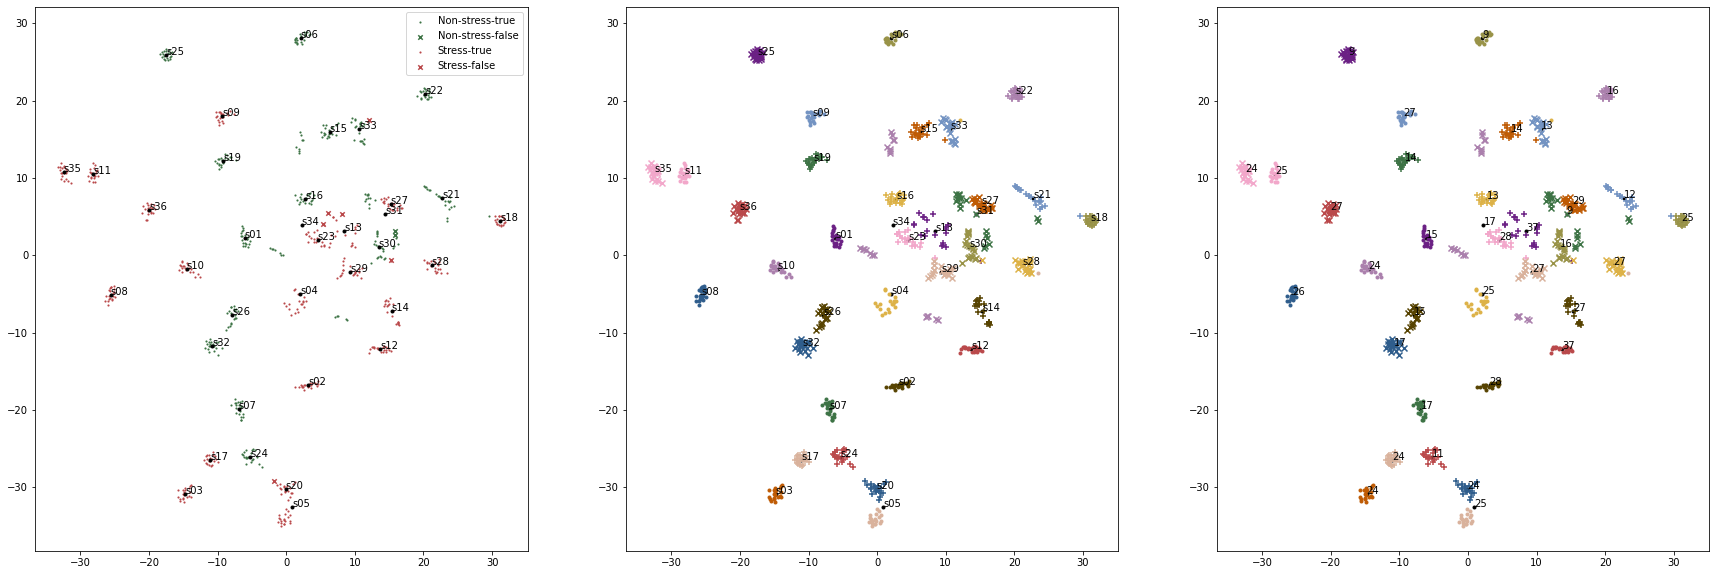

========== 19 ==========
['P4_Theta' 'T4_Low_beta' 'P4_Delta' 'F3_Gamma' 'F3_Beta' 'beta_frontal'
 'F3_Delta' 'F4_Delta' 'P4_Alpha' 'F7_Alpha' 'T6_Alpha' 'T4_Theta'
 'C3_Theta' 'F3_Theta' 'C3_Delta' 'F3_Alpha' 'C3_relative_gamma'
 'alpha_frontal' 'Fp1_Delta']
X_ori.shape=(720, 19) y_ori.shape=(720,)
SVM: 0.99 0.979 0.014
LR: 0.858 0.842 0.051
Boost: 1.0 0.964 0.015
Ada: 0.99 0.94 0.026
RF: 1.0 0.974 0.021
LDA: 0.829 0.835 0.051


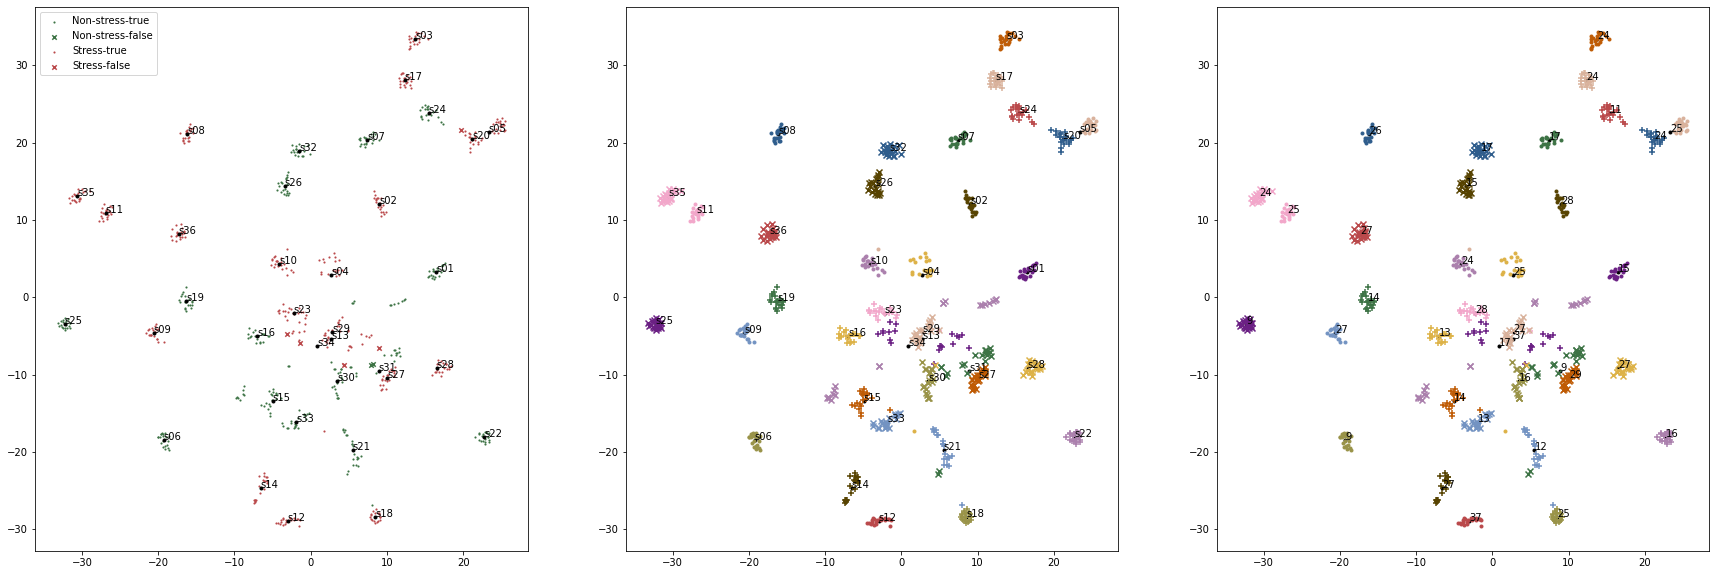

========== 20 ==========
['P4_Theta' 'T4_Low_beta' 'P4_Delta' 'F3_Gamma' 'F3_Beta' 'beta_frontal'
 'F3_Delta' 'F4_Delta' 'P4_Alpha' 'F7_Alpha' 'T6_Alpha' 'T4_Theta'
 'C3_Theta' 'F3_Theta' 'C3_Delta' 'F3_Alpha' 'C3_relative_gamma'
 'alpha_frontal' 'Fp1_Delta' 'alpha_asymmetry']
X_ori.shape=(720, 20) y_ori.shape=(720,)
SVM: 0.988 0.979 0.013
LR: 0.864 0.846 0.042
Boost: 1.0 0.964 0.02
Ada: 0.99 0.912 0.023
RF: 1.0 0.979 0.019
LDA: 0.833 0.829 0.038


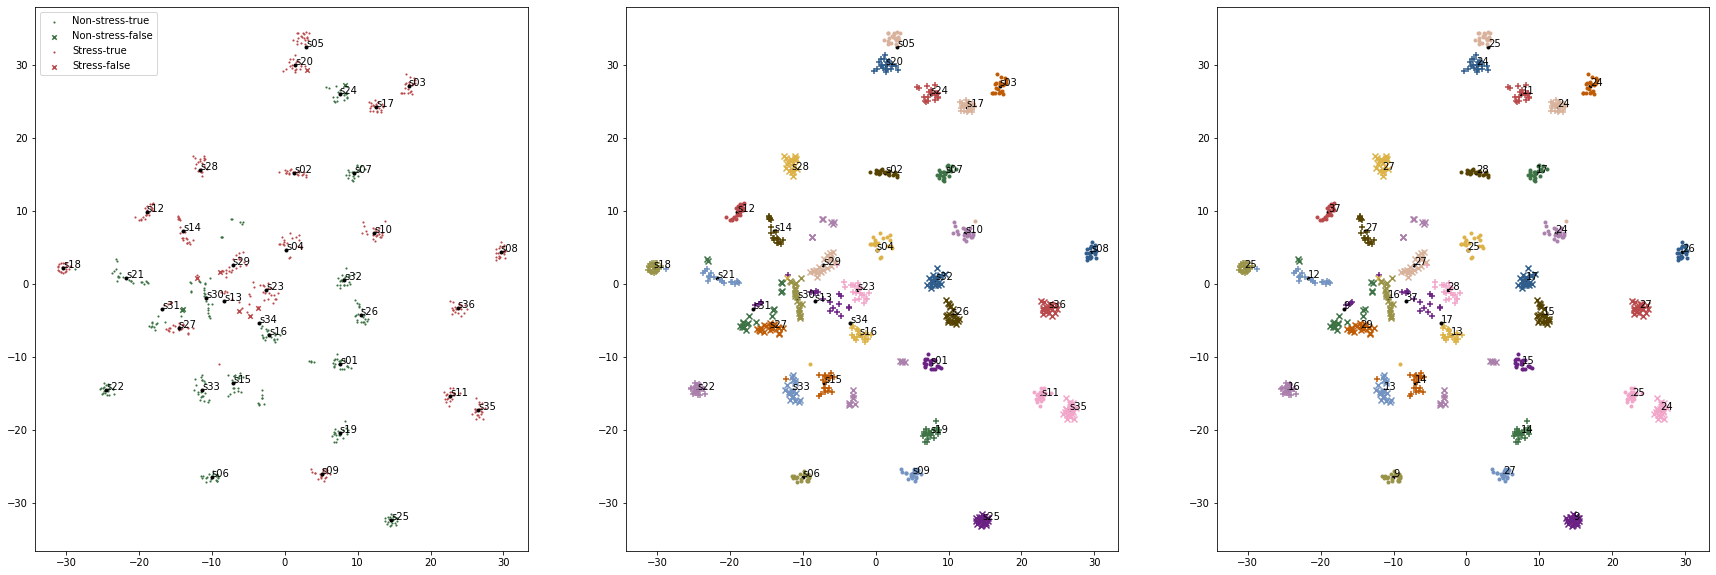

========== 21 ==========
['P4_Theta' 'T4_Low_beta' 'P4_Delta' 'F3_Gamma' 'F3_Beta' 'beta_frontal'
 'F3_Delta' 'F4_Delta' 'P4_Alpha' 'F7_Alpha' 'T6_Alpha' 'T4_Theta'
 'C3_Theta' 'F3_Theta' 'C3_Delta' 'F3_Alpha' 'C3_relative_gamma'
 'alpha_frontal' 'Fp1_Delta' 'alpha_asymmetry' 'T3_Gamma']
X_ori.shape=(720, 21) y_ori.shape=(720,)
SVM: 0.988 0.982 0.013
LR: 0.86 0.849 0.048
Boost: 1.0 0.961 0.014
Ada: 0.99 0.925 0.019
RF: 1.0 0.976 0.014
LDA: 0.832 0.822 0.049


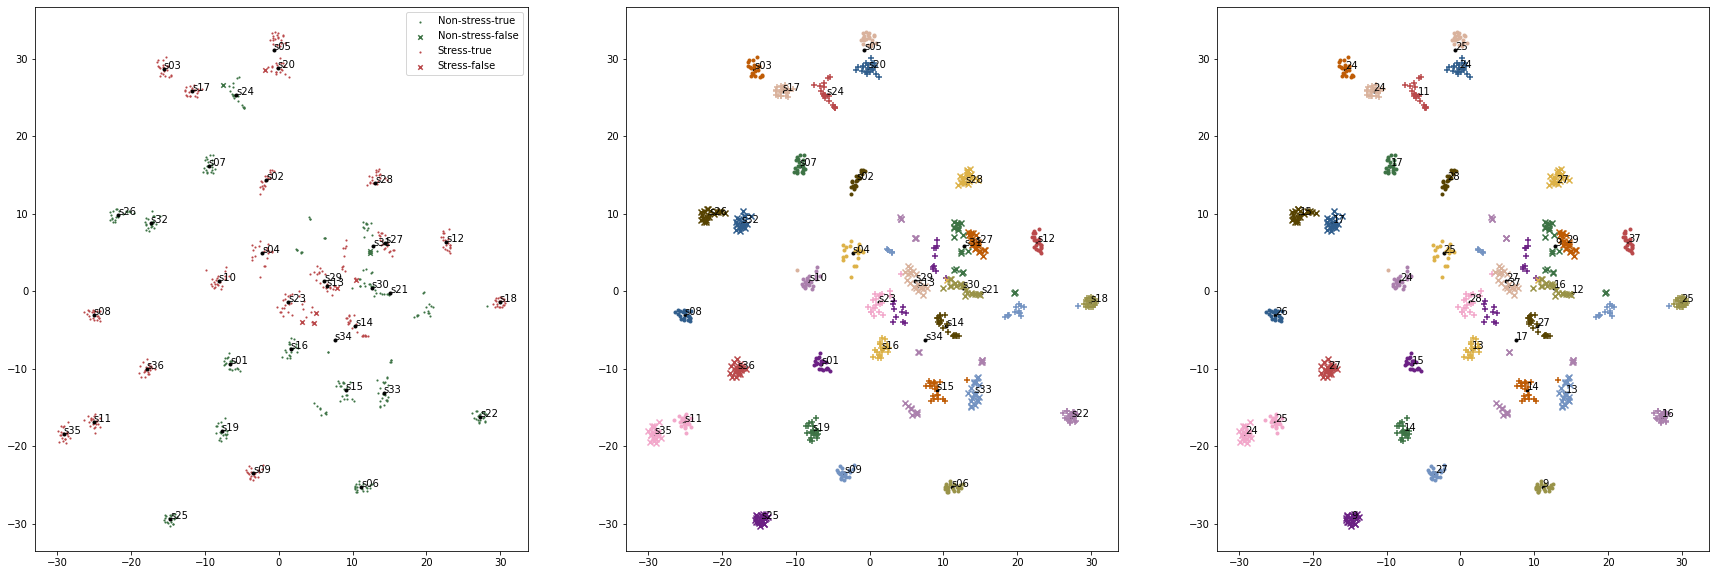

========== 22 ==========
['P4_Theta' 'T4_Low_beta' 'P4_Delta' 'F3_Gamma' 'F3_Beta' 'beta_frontal'
 'F3_Delta' 'F4_Delta' 'P4_Alpha' 'F7_Alpha' 'T6_Alpha' 'T4_Theta'
 'C3_Theta' 'F3_Theta' 'C3_Delta' 'F3_Alpha' 'C3_relative_gamma'
 'alpha_frontal' 'Fp1_Delta' 'alpha_asymmetry' 'T3_Gamma' 'F3_Slow']
X_ori.shape=(720, 22) y_ori.shape=(720,)
SVM: 0.988 0.979 0.016
LR: 0.86 0.846 0.046
Boost: 1.0 0.964 0.019
Ada: 0.99 0.928 0.03
RF: 1.0 0.981 0.014
LDA: 0.832 0.826 0.032


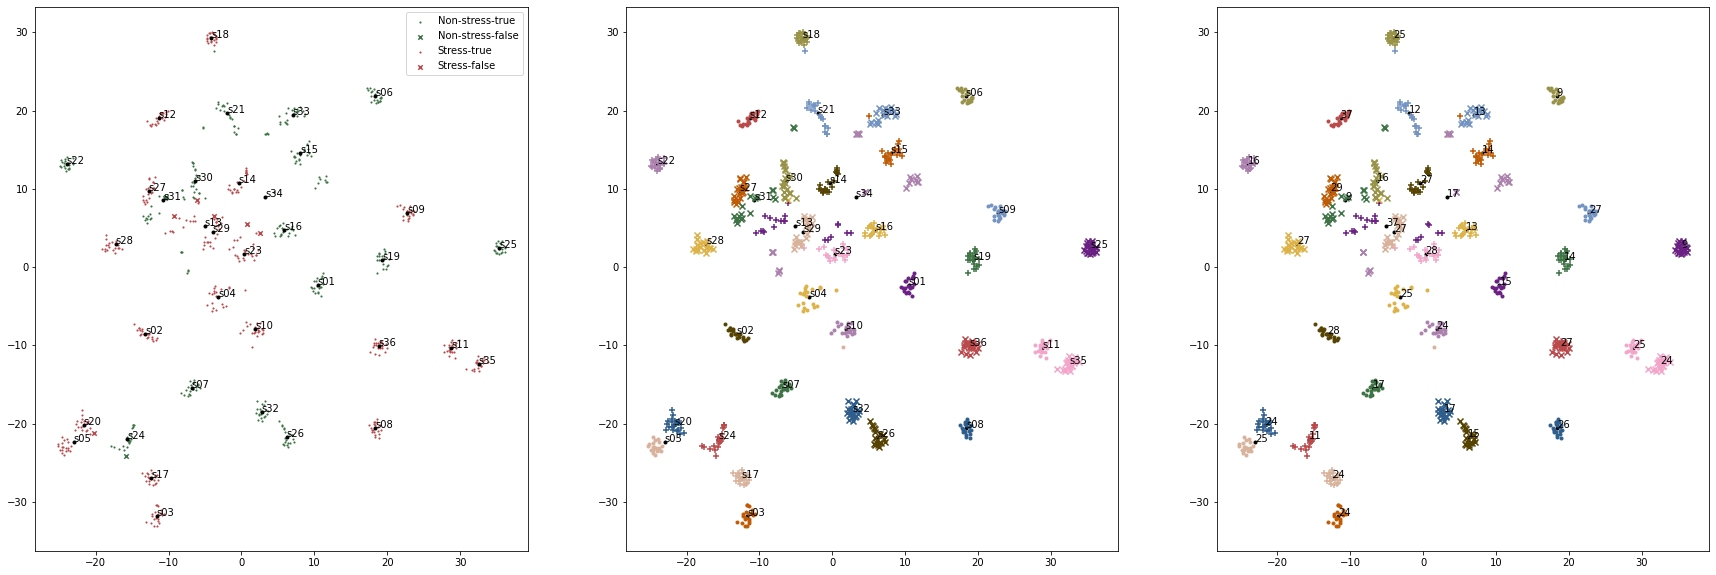

========== 23 ==========
['P4_Theta' 'T4_Low_beta' 'P4_Delta' 'F3_Gamma' 'F3_Beta' 'beta_frontal'
 'F3_Delta' 'F4_Delta' 'P4_Alpha' 'F7_Alpha' 'T6_Alpha' 'T4_Theta'
 'C3_Theta' 'F3_Theta' 'C3_Delta' 'F3_Alpha' 'C3_relative_gamma'
 'alpha_frontal' 'Fp1_Delta' 'alpha_asymmetry' 'T3_Gamma' 'F3_Slow'
 'F3_Low_beta']
X_ori.shape=(720, 23) y_ori.shape=(720,)
SVM: 0.988 0.979 0.011
LR: 0.861 0.844 0.029
Boost: 1.0 0.956 0.016
Ada: 0.99 0.921 0.027
RF: 1.0 0.978 0.014
LDA: 0.844 0.828 0.047


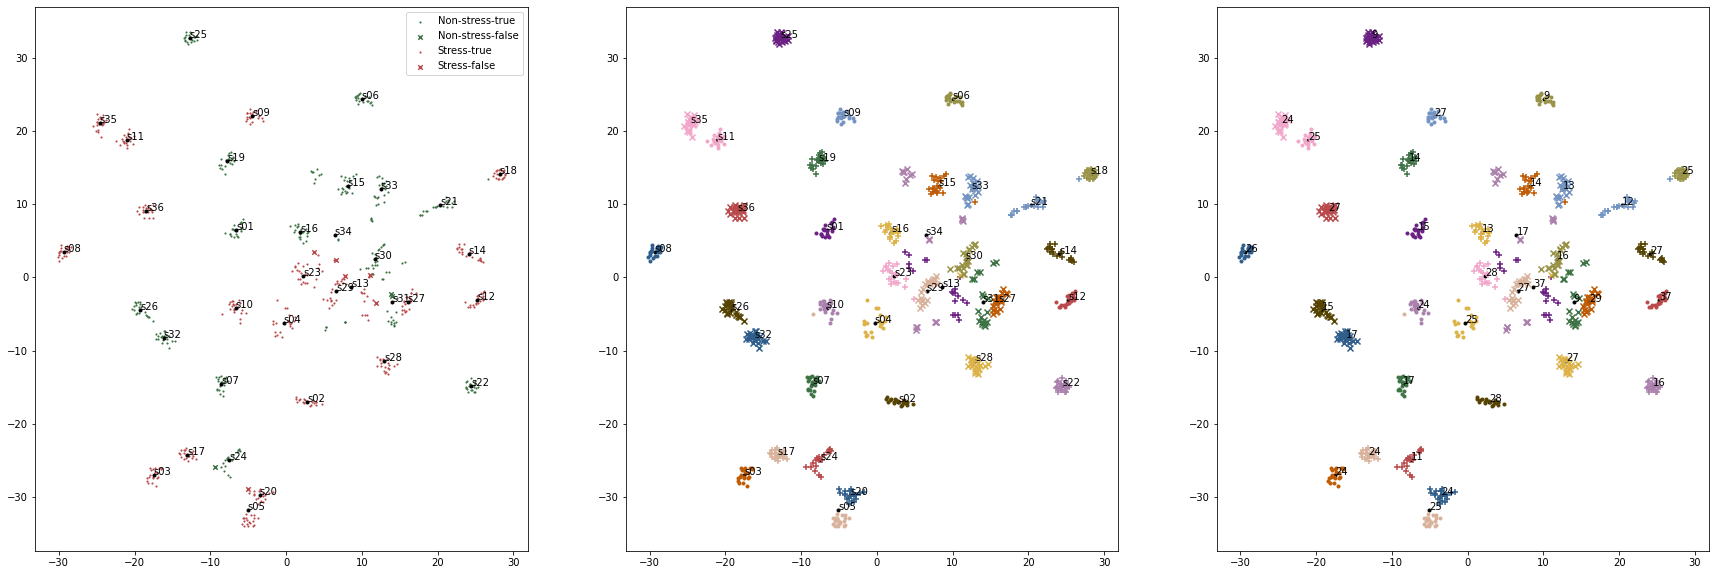

========== 24 ==========
['P4_Theta' 'T4_Low_beta' 'P4_Delta' 'F3_Gamma' 'F3_Beta' 'beta_frontal'
 'F3_Delta' 'F4_Delta' 'P4_Alpha' 'F7_Alpha' 'T6_Alpha' 'T4_Theta'
 'C3_Theta' 'F3_Theta' 'C3_Delta' 'F3_Alpha' 'C3_relative_gamma'
 'alpha_frontal' 'Fp1_Delta' 'alpha_asymmetry' 'T3_Gamma' 'F3_Slow'
 'F3_Low_beta' 'alpha_temporal']
X_ori.shape=(720, 24) y_ori.shape=(720,)
SVM: 0.986 0.976 0.022
LR: 0.86 0.842 0.023
Boost: 1.0 0.957 0.021
Ada: 0.99 0.922 0.024
RF: 1.0 0.976 0.02
LDA: 0.844 0.829 0.03


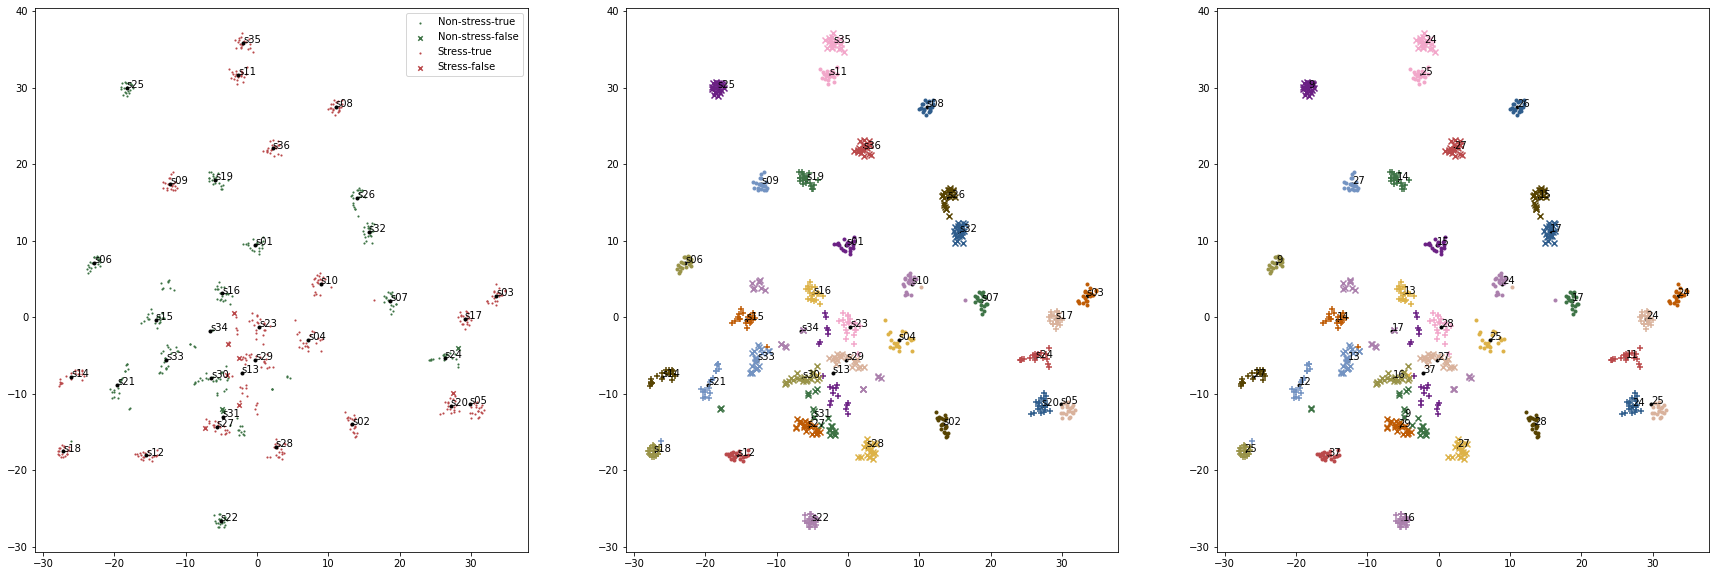

========== 25 ==========
['P4_Theta' 'T4_Low_beta' 'P4_Delta' 'F3_Gamma' 'F3_Beta' 'beta_frontal'
 'F3_Delta' 'F4_Delta' 'P4_Alpha' 'F7_Alpha' 'T6_Alpha' 'T4_Theta'
 'C3_Theta' 'F3_Theta' 'C3_Delta' 'F3_Alpha' 'C3_relative_gamma'
 'alpha_frontal' 'Fp1_Delta' 'alpha_asymmetry' 'T3_Gamma' 'F3_Slow'
 'F3_Low_beta' 'alpha_temporal' 'F4_Alpha']
X_ori.shape=(720, 25) y_ori.shape=(720,)
SVM: 0.988 0.978 0.02
LR: 0.861 0.849 0.035
Boost: 1.0 0.957 0.019
Ada: 0.99 0.931 0.024
RF: 1.0 0.978 0.023
LDA: 0.846 0.831 0.034


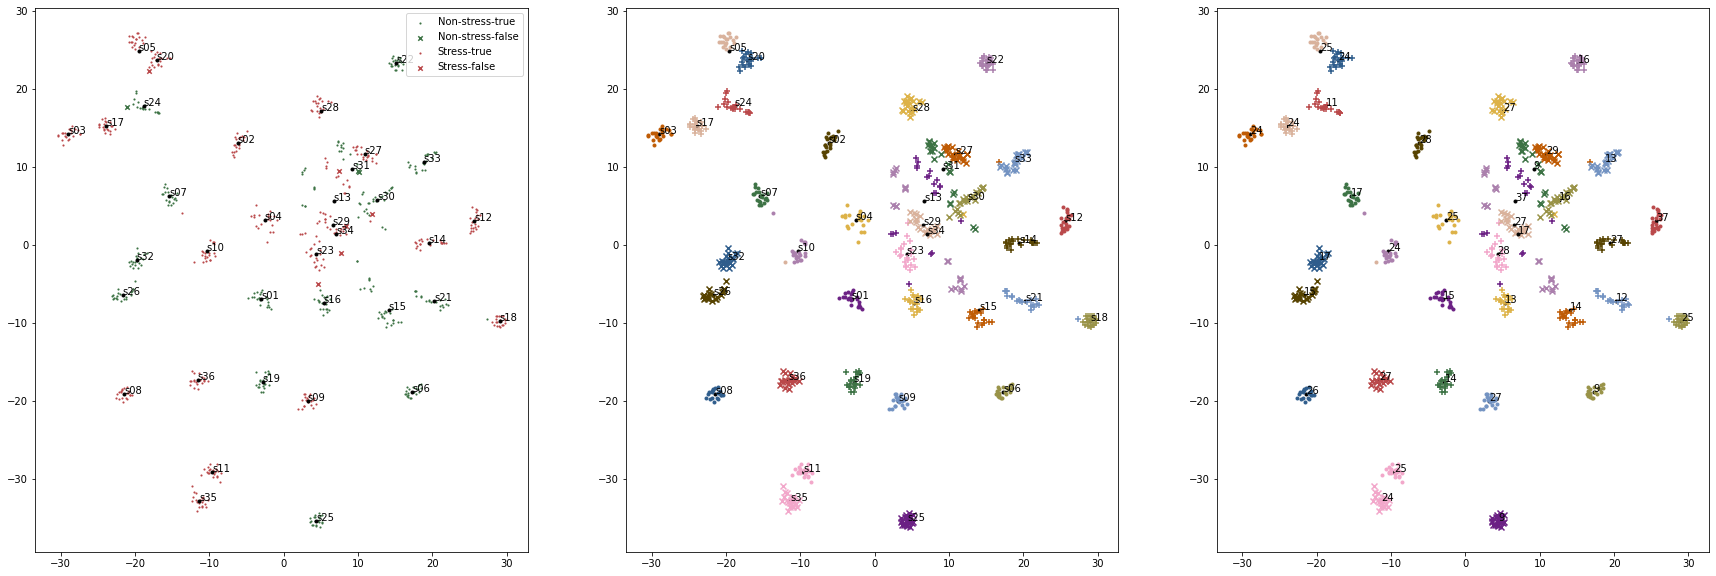

In [7]:
csv = pd.read_csv('export/15s_133features_filter_std.csv')
rank = rank_ada
for i in range(1,25+1):
    print("="*10,i,"="*10)
    print(features[rank[:i]])
    X,y = getXY(csv.copy(), features=features[rank[:i]])
    model = train_pipe(X,y)

    plot_TSNE(model=model,X_ori=X,y_ori=y)
    # break